tensor([ 2.0845, -1.3087,  0.7868])


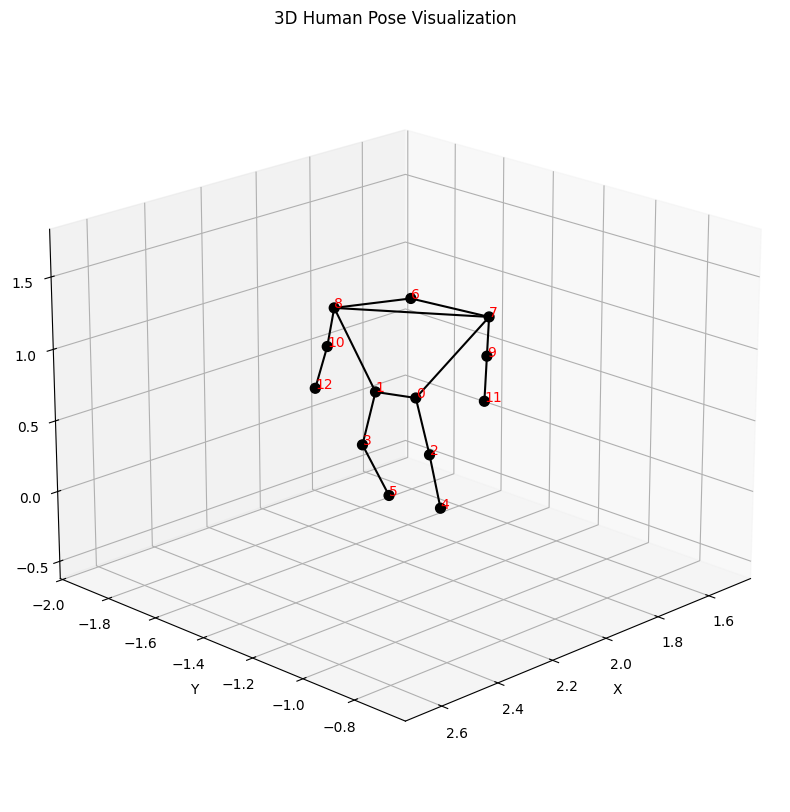

In [16]:
# 读取3dpw里的一个.pt文件(preprocessed\3dpw_input10_v2\train\0.pt),并将读取到的TemporalData对象转化为字典
import numpy as np
import torch
import os.path as osp
import matplotlib.pyplot as plt

# 指定文件路径
pt_path = osp.join("preprocessed", "3dpw_input10_v2", "weighted", "train", "0.pt")

# 读取.pt文件
data = torch.load(pt_path)

# 将TemporalData对象转换为字典
data_dict = dict(data)

body_xyz_one_f_t = data_dict["body_xyz"][0][
    0
]  # 一个智能体在一个时间步的关节点坐标，共13个关节点，每个关节点有3个坐标(xyz)

# 可视化body_xyz_one_f_t
plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

# 绘制关节点
ax.scatter3D(
    body_xyz_one_f_t[:, 0],  # x坐标
    body_xyz_one_f_t[:, 1],  # y坐标
    body_xyz_one_f_t[:, 2],  # z坐标
    c="black",
    alpha=1.0,
    s=50,
)

# 标上每个关节点的索引
for i in range(body_xyz_one_f_t.shape[0]):
    ax.text(
        body_xyz_one_f_t[i, 0],
        body_xyz_one_f_t[i, 1],
        body_xyz_one_f_t[i, 2],
        str(i),
        color="red",
    )

# 定义3DPW数据集骨骼连接关系
EDGES_3DPW = np.array(
    [
        (0, 1),
        (1, 8),
        (8, 7),
        (7, 0),
        (0, 2),
        (2, 4),
        (1, 3),
        (3, 5),
        (7, 9),
        (9, 11),
        (8, 10),
        (10, 12),
        (6, 7),
        (6, 8),
    ]
)

# 绘制骨骼连接
for edge in EDGES_3DPW:
    x = [body_xyz_one_f_t[edge[0], 0], body_xyz_one_f_t[edge[1], 0]]
    y = [body_xyz_one_f_t[edge[0], 1], body_xyz_one_f_t[edge[1], 1]]
    z = [body_xyz_one_f_t[edge[0], 2], body_xyz_one_f_t[edge[1], 2]]
    ax.plot(x, y, z, c="black")

# 设置坐标轴标签
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# 设置视角
ax.view_init(elev=20, azim=45)

# 设置坐标轴范围
margin = 0.5
ax.set_xlim(
    [body_xyz_one_f_t[:, 0].min() - margin, body_xyz_one_f_t[:, 0].max() + margin]
)
ax.set_ylim(
    [body_xyz_one_f_t[:, 1].min() - margin, body_xyz_one_f_t[:, 1].max() + margin]
)
ax.set_zlim(
    [body_xyz_one_f_t[:, 2].min() - margin, body_xyz_one_f_t[:, 2].max() + margin]
)

# 计算所有关节点坐标的平均值
body_xyz_mean = body_xyz_one_f_t.mean(dim=0)
# 计算加权平均位置
weight_scheme = {
    0: 0.15,
    1: 0.15,
    2: 0.08,
    3: 0.08,
    4: 0.05,
    5: 0.05,
    6: 0.15,
    7: 0.10,
    8: 0.10,
    9: 0.04,
    10: 0.04,
    11: 0.01,
    12: 0.01,
}
weights = torch.tensor([weight_scheme[i] for i in range(len(weight_scheme))])
weights /= weights.sum()
body_xyz_weighted = torch.tensordot(data_dict["body_xyz"], weights, dims=([2], [0]))
print(body_xyz_weighted[0][0])
# 在图中标上加权平均值
ax.scatter3D(
    body_xyz_weighted[0],
    body_xyz_weighted[0],
    body_xyz_weighted[0],
    c="red",
    s=100,
)

plt.title("3D Human Pose Visualization")
plt.show()
# plt.savefig("3dpw_hip_mean.png")